In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

import warnings
warnings.filterwarnings('ignore')


/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
# Load the dataset 
df=pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
# top 10 datasets
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# check the null values
df.isnull().mean()*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

<Axes: xlabel='Geography'>

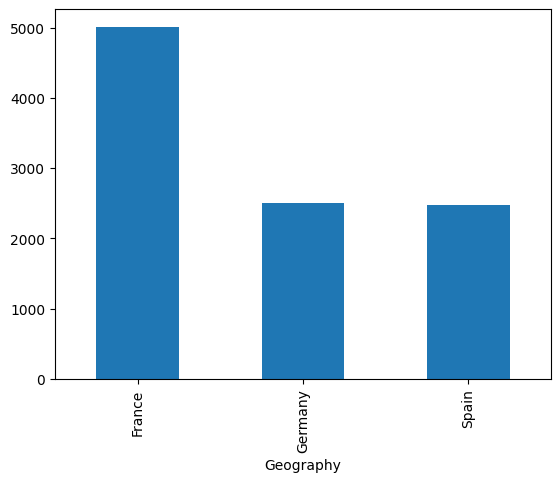

In [5]:
# Geography 
df["Geography"].value_counts().plot(kind="bar")

<Axes: xlabel='Gender'>

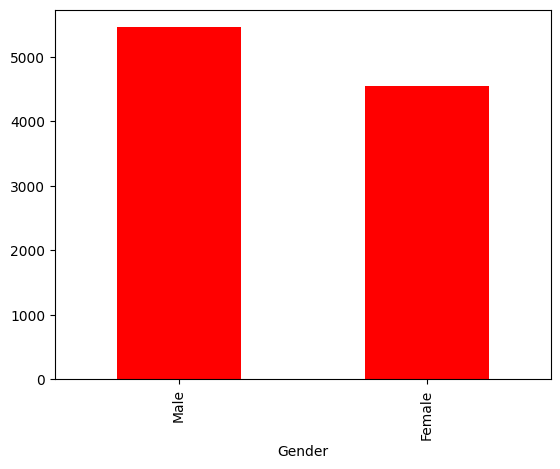

In [6]:
df["Gender"].value_counts().plot(kind="bar",color="r")

<Axes: xlabel='Tenure'>

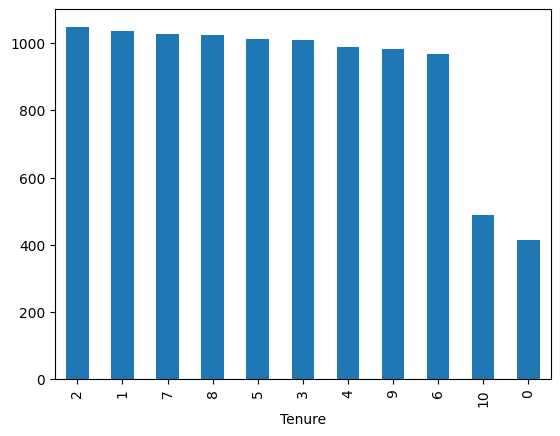

In [7]:
df["Tenure"].value_counts().plot(kind="bar")

<Axes: xlabel='NumOfProducts'>

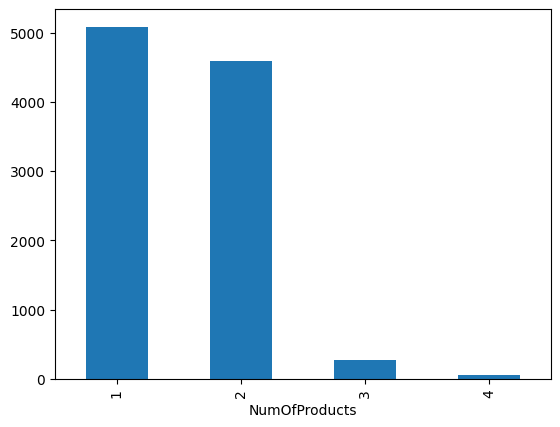

In [8]:
df["NumOfProducts"].value_counts().plot(kind="bar")

<Axes: xlabel='HasCrCard'>

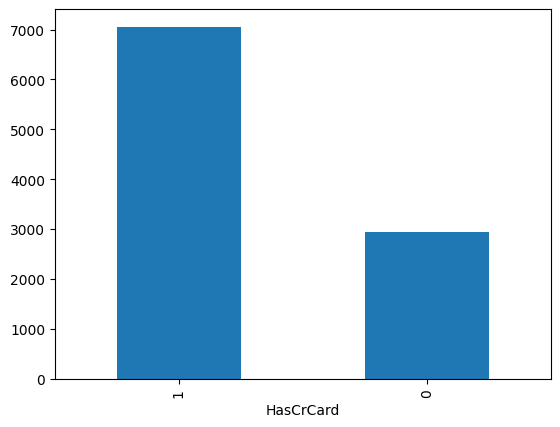

In [9]:
df["HasCrCard"].value_counts().plot(kind="bar")

<Axes: xlabel='IsActiveMember'>

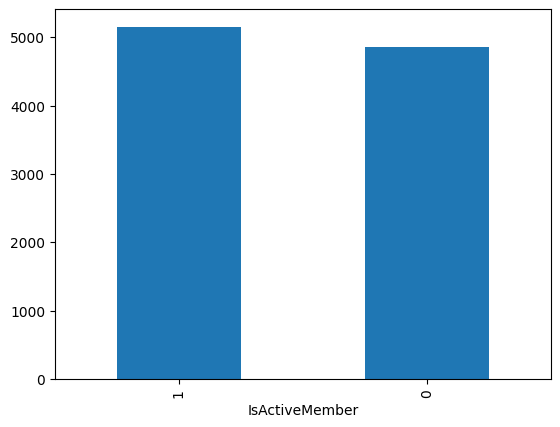

In [10]:
df["IsActiveMember"].value_counts().plot(kind="bar")

<Axes: xlabel='Exited'>

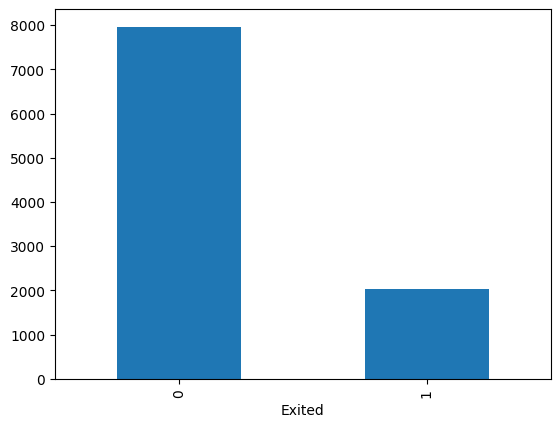

In [11]:
df["Exited"].value_counts().plot(kind="bar")

In [12]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [13]:

#convert the Gender data into binary format
df['Geography'].replace({'France':'1','Spain':'0',"Germany":'3'},inplace=True)
df['Gender'].replace({'Male':'1','Female':'0'},inplace=True)

/tmp/ipykernel_13/172234912.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Geography'].replace({'France':'1','Spain':'0',"Germany":'3'},inplace=True)
/tmp/ipykernel_13/172234912.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [14]:
y=df.iloc[:,-1:]
X=df.drop(columns=df.iloc[:,0:3])
X=X.drop(columns=X.iloc[:,-1:])
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,0,42,2,0.00,1,1,1,101348.88
1,608,0,0,41,1,83807.86,1,0,1,112542.58
2,502,1,0,42,8,159660.80,3,1,0,113931.57
3,699,1,0,39,1,0.00,2,0,0,93826.63
4,850,0,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64
9996,516,1,1,35,10,57369.61,1,1,1,101699.77
9997,709,1,0,36,7,0.00,1,0,1,42085.58
9998,772,3,1,42,3,75075.31,2,1,0,92888.52


In [15]:
X.shape

(10000, 10)

In [16]:
y.shape

(10000, 1)

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [37]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.854

In [36]:
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8525